In [1]:
import pandas as pd
import os

from matplotlib.colors import ListedColormap
from scipy.ndimage import label

from Perceptron import Perceptron

s = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'iris', 'iris.data')

print('URL : ', s)

URL :  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [2]:
df = pd.read_csv(s, header=None, encoding='utf-8')

In [3]:
import ssl
import pandas as pd

ssl._create_default_https_context = ssl._create_unverified_context

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, header=None, encoding='utf-8')

In [4]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


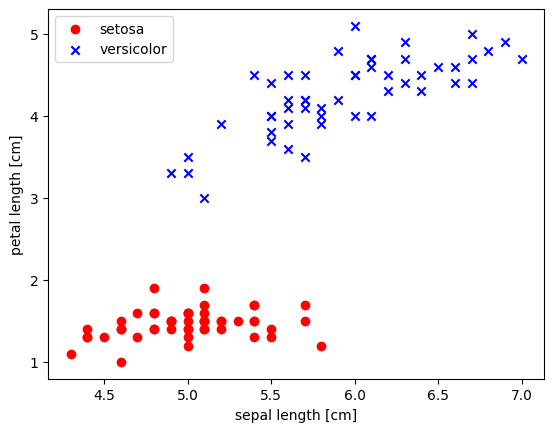

In [5]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values # 4 번째 칸 100개 출력(타겟 데이터)
y = np.where(y == 'Iris-setosa', -1, 1) # 1(Iris-setosa), -1(Iris-virginica)

X = df.iloc[0:100, [0, 2]].values # 0 => 꽃 받침 길이, 2 => 꽃잎 길이

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

test 0.01624345363663242
test 0.01624345363663242
test 0.01624345363663242
test 0.01624345363663242
test 0.01624345363663242
test 0.01624345363663242
test 0.01624345363663242
test 0.01624345363663242
test 0.01624345363663242
test 0.01624345363663242
test 0.01624345363663242
test 0.01624345363663242
test 0.01624345363663242
test 0.01624345363663242
test 0.01624345363663242
test 0.01624345363663242
test 0.01624345363663242
test 0.01624345363663242
test 0.01624345363663242
test 0.01624345363663242
test 0.01624345363663242
test 0.01624345363663242
test 0.01624345363663242
test 0.01624345363663242
test 0.01624345363663242
test 0.01624345363663242
test 0.01624345363663242
test 0.01624345363663242
test 0.01624345363663242
test 0.01624345363663242
test 0.01624345363663242
test 0.01624345363663242
test 0.01624345363663242
test 0.01624345363663242
test 0.01624345363663242
test 0.01624345363663242
test 0.01624345363663242
test 0.01624345363663242
test 0.01624345363663242
test 0.01624345363663242


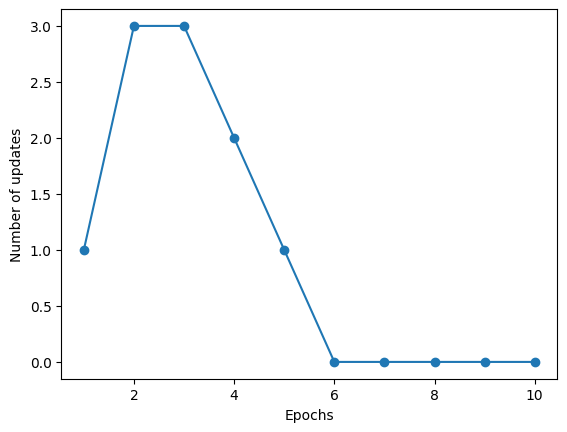

In [6]:
from Perceptron import Perceptron
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

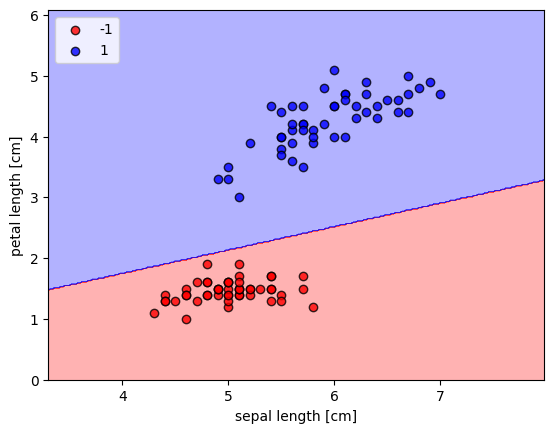

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y))])

"""
각 feature 별로 값의 범위를 계산하기 위함
"""
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

"""
위에서 구한 x1, x2 의 범위를 기반으로 하는 격자를 생성하려면 numpy.arrange 를 사용해서 작은 간격의 값들을 생성해야 함, 이렇게 생성한뒤 np.meshgrid 로 결합

설명: https://tbr74.tistory.com/entry/numpy-meshgrid-%ED%95%A8%EC%88%98-%EC%95%8C%EC%95%84%EB%B3%B4%EA%B8%B0
"""
xx1, xx2 = np.meshgrid(
    np.arange(x1_min, x1_max, 0.02), # x 축 범위
    np.arange(x2_min, x2_max, 0.02) # y 축 범위
)

"""
이건 생각해보면 아주 쉬운데 xx1 을 flatten 하고, xx2 를 flatten 했을때 생각해보면 아래와 같이 그려짐

[[x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8, x_9, x_10]
[y_1, y_2, y_3, y_4, y_5, y_6, y_7, y_8, y_9, y_10]]

근데 우리가 하려는건 결국 [x_1, y_1] 의 쌍을 만드는것, 그래서 T(전치행렬)로 만듬.
그렇게 되면 [[x_1, y_1], [x_2, y_2], ... [x_10, y_10]] 으로 변하게 됨.
"""
Z = ppn.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

"""
reshape 는 1차원 배열 Z 를 격자(xx1 과 동일한 형태)의 2차원 배열로 변환시킴

밑의 예시를 보면 더 쉬움
"""
#  print(xx1.shape) # 305 * 235 vector
Z = Z.reshape(xx1.shape)

"""
contourf 는 **등고선 그래프(Contour Plot)** 을 그리는 함수

argument1: X 좌표를 정의한 2D 격자 배열
argument2: Y 좌표를 정의한 2D 격자 배열
Z: 각 점의 예측값으로 이루어진 2D 배열 (Z[i, j] 는 좌표 (X[i, j], Y[i, j]) 에서의 값을 뜻함
cmap: 색상맵
"""
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], label=cl, edgecolors='black')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

In [8]:
import numpy as np

# 가상 데이터를 생성 (격자 좌표)
xx1, xx2 = np.meshgrid(
    np.arange(0, 1.5, 0.5),  # x축 범위 ( 3 * 3 vector)
    np.arange(0, 1.5, 0.5)  # y축 범위 ( 3 * 3 vector)
)


print(xx1.shape)

# 격자 예측값을 가정 (1차원 배열로 반환된 결과)
Z = np.array([1, -1, 1, 1, -1, -1, 1, -1, 1])  # 가상 예측값
print("Before reshape (Z):", Z)

# Z를 격자 형태로 재구성
Z = Z.reshape(xx1.shape) # ( 3 * 3 vector)
print("After reshape (Z):\n", Z)

(3, 3)
Before reshape (Z): [ 1 -1  1  1 -1 -1  1 -1  1]
After reshape (Z):
 [[ 1 -1  1]
 [ 1 -1 -1]
 [ 1 -1  1]]


[[-0.89168225 -0.87157792 -0.85012448 ... -0.85012448 -0.87157792
  -0.89168225]
 [-0.87157792 -0.8496589  -0.8264126  ... -0.8264126  -0.8496589
  -0.87157792]
 [-0.85012448 -0.8264126  -0.80139762 ... -0.80139762 -0.8264126
  -0.85012448]
 ...
 [-0.85012448 -0.8264126  -0.80139762 ... -0.80139762 -0.8264126
  -0.85012448]
 [-0.87157792 -0.8496589  -0.8264126  ... -0.8264126  -0.8496589
  -0.87157792]
 [-0.89168225 -0.87157792 -0.85012448 ... -0.85012448 -0.87157792
  -0.89168225]]


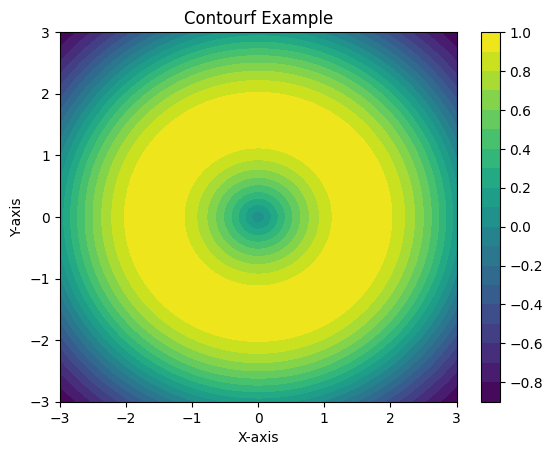

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 격자 생성
x = np.linspace(-3, 3, 100)  # x축 좌표
y = np.linspace(-3, 3, 100)  # y축 좌표
xx, yy = np.meshgrid(x, y)

# z 값 정의 (예: 함수값)
Z = np.sin(np.sqrt(xx ** 2 + yy ** 2))
print(Z)

# 등고선 그래프
plt.contourf(xx, yy, Z, levels=20, cmap='viridis')
plt.colorbar()  # 색상 막대 추가
plt.title("Contourf Example")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()